In [1]:
import numpy as np

import librosa as lr
from kymatio_audio import scattering_audio_distance as sad

from IPython import display as ipd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 3]

from sklearn.manifold import MDS

In [2]:
pathAudio = 'audio/musical_instruments/McAdams1995'
files = lr.util.find_files(pathAudio, ext=['aiff']) 
files = np.asarray(files)
audio = []
 
for y in files: 
    data, sr = lr.load(y, sr = 22050,mono = True)   
    audio.append(data)

from pathlib import Path

names = []
for f in files:
    names.append(Path(f).stem.split('_')[2])

labels = ['French Horn', 'Trumpet', 'Trombone', 'Harp', 'Trumpet + Guitar', 'Oboe + Celeste', 'Vibraphone', 'Bowed String + Piano', 'Harpsichord', 'English Horn', 'Bassoon', 'Clarinet', 'Vibraphone + Trombone', 'Oboe + Harpsichord', 'Guitar', 'Bowed String', 'Piano', 'Guitar + Clarinet']

mask = [0, 1, 2, 3, 6, 8, 9, 10, 11, 14, 15, 16]

classes = [0, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1]

from itertools import compress

labels = np.array(labels)[mask].tolist() 
audio = np.array(audio)[mask].tolist()

a = np.hstack(audio)

import scipy.io.wavfile
scipy.io.wavfile.write('demo/mcadams.wav', sr, a)

ipd.Audio(a, rate=sr)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
mss_distances = sad.multiscale_audio_distance(audio, sr)

Max num samples 24064
Max duration 1.0913378684807256 seconds.


/Users/lagrange/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


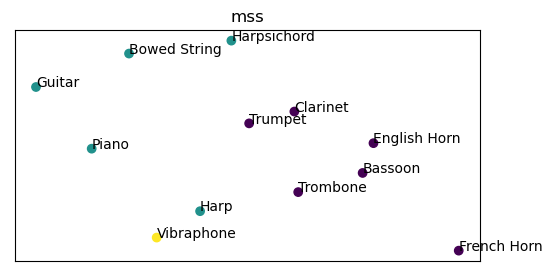

In [ ]:
def plot_dist(distances, dist_type):
    emb = MDS(n_components=2, dissimilarity='precomputed', random_state=0).fit_transform(distances)
    plt.scatter(emb[:, 0], emb[:, 1], c=classes)
    for l_i, l in enumerate(labels):
        plt.text(emb[l_i, 0], emb[l_i, 1], l)
    plt.title(dist_type)
    plt.xticks([]),plt.yticks([])
    plt.savefig('demo/mcadams_'+dist_type+'.png')
    plt.show()

plot_dist(mss_distances, 'mss')

/Users/lagrange/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


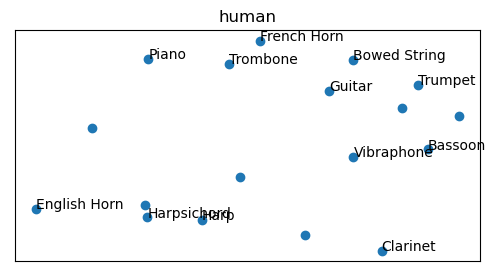

In [ ]:
human = np.loadtxt(pathAudio+"/dissimilarity_matrix.txt", delimiter="\t", dtype=float)
human = human+np.rot90(np.fliplr(human))
plot_dist(human, 'human')

In [ ]:
scattering_distances = sad.scattering_audio_distance(audio, sr)

Max num samples 24064
Max duration 1.0913378684807256 seconds.
Time support: 1.486077097505669 seconds.


/Users/lagrange/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


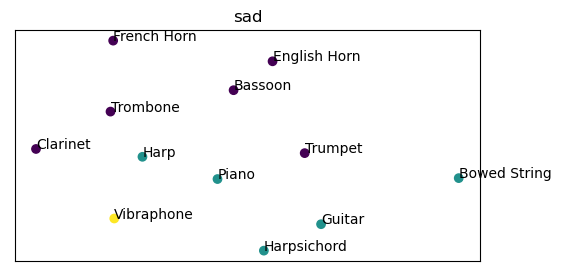

In [ ]:
plot_dist(scattering_distances, 'sad')